<a href="https://colab.research.google.com/github/GPINTOC/Proyecto-2-Coding-Dojo/blob/main/Proyecto2_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2 - Parte 2 (base)** 

DATASET TIPO DE ATENCION A PACIENTES (HOSPITALIZADOS O AMBULATORIOS) DE ACUERDO A RESULTADOS DE VARAIBLES DE HEMOGRAMAS

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes 

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

In [1]:
import numpy as np
import pandas as pd

In [2]:
filename = '/content/drive/MyDrive/Documentos CodingDojo/data-ori.csv'
df = pd.read_csv(filename)
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


# **PREPROCESAMIENTO DE DATOS**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [4]:
df1 = df.copy()
df1
df1.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [5]:
# No hay datos duplicados
df1.duplicated().sum()

0

In [6]:
# No hay datos nulos o Nan
df1.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [7]:
# Reviso si hay valores incoherentes 
df1.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


En este caso, no existe ningún valor aberrante, ya que todos son relativos a pacientes sanos o no sanos, pero dentro de criterios médicos de valores existentes, tanto dentro como fuera de los rangos de referencia. Hay que tomar en cuenta que la edad es relevante en este modelo ya que tiene directa relación con las variables.

In [76]:
df1['SOURCE'].value_counts()

0    2628
1    1784
Name: SOURCE, dtype: int64

In [15]:
# Reviso en mi columna categórica de salida, si solo existen las dos salidas que se indican
df1['SOURCE'].value_counts(normalize = True)

0    0.595648
1    0.404352
Name: SOURCE, dtype: float64

In [9]:
# Reviso si solo existen 2 categorías de sexo en el dataset
df1['SEX'].value_counts()

M    2290
F    2122
Name: SEX, dtype: int64

In [10]:
# Reemplazo mi columna objetivo por 0 para out(ambulatorio) y 1 para in(hospitalizado)
df1['SOURCE'] = df1['SOURCE'].replace({'out':0, 'in':1})

In [11]:
df1.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0


Todos los datos corresponden a valores de hemograma que pueden ser predictivos de la gravedad de una persona, por lo que considero que todas las columnas son importantes y no eliminaré ninguna.

In [33]:
# Al filtrar por valor 21, en donde un paciente ya podría necesitar una transfusión de sangre, no hay relación exacta con source
hematocrito_anormal = df1[df1['HAEMATOCRIT'] <= 21]
hematocrito_anormal

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
515,16.7,4.6,3.09,5.1,306,14.9,27.5,54.0,20,M,1
912,14.6,3.8,2.31,5.2,403,16.5,26.0,63.2,26,F,0
1076,21.0,6.7,2.15,5.9,185,31.2,31.9,97.7,29,M,1
2332,17.7,6.2,2.02,18.1,527,30.7,35.0,87.6,50,M,0
2514,19.8,6.7,2.98,21.6,168,22.5,33.8,66.4,53,M,0
2851,18.8,5.8,1.93,9.9,261,30.1,30.9,97.4,58,F,0
3413,19.6,6.4,2.38,30.6,211,26.9,32.7,82.4,66,F,1
3589,18.6,6.1,2.25,8.6,22,27.1,32.8,82.7,68,M,1
3592,13.7,4.4,1.48,5.3,263,29.7,32.1,92.6,68,F,0
3736,20.7,6.4,1.98,52.8,388,32.3,30.9,104.5,70,F,0


In [35]:
# En este caso, se puede ver que la gran mayoría de los pacientes con plaquetas bajas (clasificadas como valor crítico) son tratados como hospitalizados
plaqueta_anormal = df1[df1['THROMBOCYTE'] <= 20]
plaqueta_anormal

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
538,43.3,15.0,5.14,5.3,19,29.2,34.6,84.2,21,M,1
816,50.5,16.4,7.05,3.9,15,23.3,32.5,71.6,25,M,1
817,49.7,16.1,6.95,3.6,15,23.2,32.4,71.5,25,M,1
818,49.7,16.0,6.91,5.5,12,23.2,32.2,71.9,25,M,1
820,53.2,17.0,7.35,6.1,12,23.1,32.0,72.4,25,M,1
821,48.4,15.5,6.79,6.7,18,22.8,32.0,71.3,25,M,1
1259,43.8,15.0,5.03,12.2,20,29.8,34.2,87.1,32,M,1
1260,44.3,15.1,5.11,14.3,20,29.5,34.1,86.7,32,M,1
2023,45.0,15.7,5.47,3.4,19,28.7,34.9,82.3,45,M,1
2025,44.4,15.6,5.43,4.6,15,28.7,35.1,81.8,45,M,1


In [46]:
# En cuanto a los valores críticos de leucocitos, se puede apreciar que hay una distribución pareja en la salida Source de 0 y 1
leucocito_anormal = df1[df1['LEUCOCYTE'] <= 3.0]
leucocito_anormal

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
9,35.4,11.4,4.80,2.6,183,23.8,32.2,73.8,1,F,0
26,32.5,10.6,4.19,1.6,111,25.3,32.6,77.6,1,F,1
28,36.8,11.9,4.69,1.9,108,25.4,32.3,78.5,1,F,1
52,44.8,15.0,5.81,2.9,125,25.8,33.5,77.1,2,M,1
58,37.9,12.7,4.82,2.9,182,26.3,33.5,78.6,2,M,0
...,...,...,...,...,...,...,...,...,...,...,...
4103,34.5,12.0,3.55,3.0,92,33.8,34.8,97.2,77,M,0
4105,38.5,13.7,4.32,2.4,218,31.7,35.6,89.1,77,M,1
4107,40.2,13.2,4.83,1.7,142,27.3,32.8,83.2,77,F,1
4136,40.1,13.6,3.84,2.8,117,35.4,33.9,104.4,78,M,0


# **EXPLORACIÓN DE DATOS**


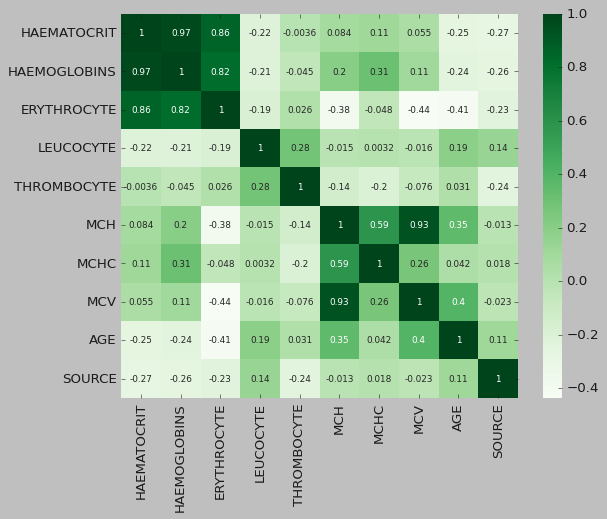

In [74]:
# Gráfico de correlación
import seaborn as sns
corr = df1.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Greens', annot = True, annot_kws = {'size': 8});
sns.set(rc = {'figure.figsize':(30, 8)});

En este mapa de calor, se puede apreciar que existen 

*Correlaciones fuertes:*

1.   Hemoglobina y hematocrito
2.   Hemoglobina y eritrocitos
3.   Hematocrito y eritrocitos
4.   MCV y MCH

*Correlaciones moderadas:*
1.   MCHC y MCH

*Correlaciones de débiles:*
1.   Age y MCV 

Es interesante recalcar que la variable objetiivo no tiene correlación con ninguna variable.

# *GRÁFICOS UNIVARIANTES*

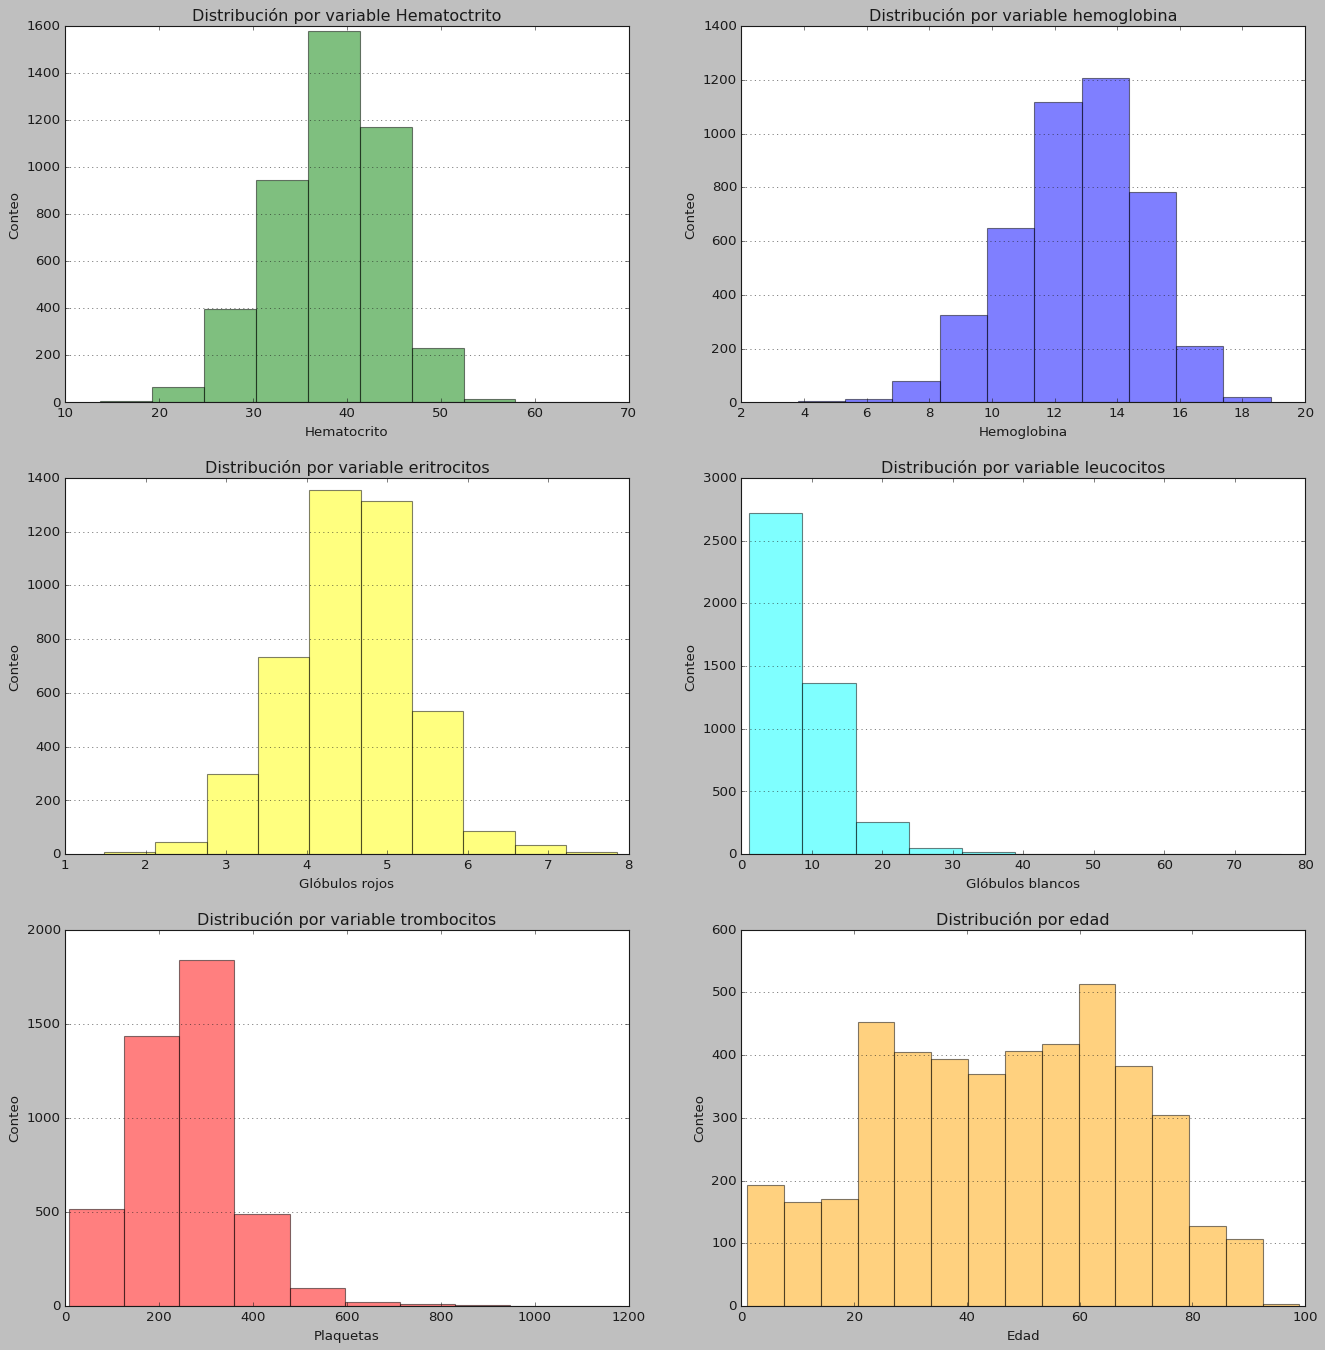

In [17]:
# HISTOGRAMAS CON SUBPLOT, FORMA 1 DE REPRESENTARLOS

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
df1['HAEMATOCRIT'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Hematoctrito')
plt.ylabel('Conteo')
plt.xlabel('Hematocrito')

plt.subplot(3, 2, 2)
df1['HAEMOGLOBINS'].hist(edgecolor = 'black', alpha = 0.5, color = 'blue');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable hemoglobina')
plt.ylabel('Conteo')
plt.xlabel('Hemoglobina')

plt.subplot(3, 2, 3)
df1['ERYTHROCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable eritrocitos')
plt.ylabel('Conteo')
plt.xlabel('Glóbulos rojos')

plt.subplot(3, 2, 4)
df1['LEUCOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'cyan', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable leucocitos')
plt.ylabel('Conteo')
plt.xlabel('Glóbulos blancos')

plt.subplot(3, 2, 5)
df1['THROMBOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'red', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable trombocitos')
plt.ylabel('Conteo')
plt.xlabel('Plaquetas')

plt.subplot(3, 2, 6)
df1['AGE'].hist(edgecolor = 'black', alpha = 0.5, color = 'orange', bins = 15);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por edad')
plt.ylabel('Conteo')
plt.xlabel('Edad')
plt.show;

En estos histogramas se puede ver la distribución de las principales variables
- Hematocrito: la mayor cantidad se presenta en el rango de 38 a 42, seguido de 43 a 47 aproximadamente, esto es el rango normal para una persona saludable.
- Hemoglobina: La mayoría de los valores se presenta en el rango de 13 a 15 aproximadamente, que tiene directa relación con la variable hematocrito.
- Eritrocitos: se distribuyen entre 4 a 5.3 en la mayoría de las personas
- Leucocitos: los valores que más se repiten van en el rango de 0 a 9.
- Trombocitos: La mayoría de los valores está en el rango de 200 a 400.
- Edad: en este gráfico se puede verificar que la data tiene una distribución casi uniforme en la selección del rango etario de las personas, sin embargo se concentran más entre los 20 a 80 años.

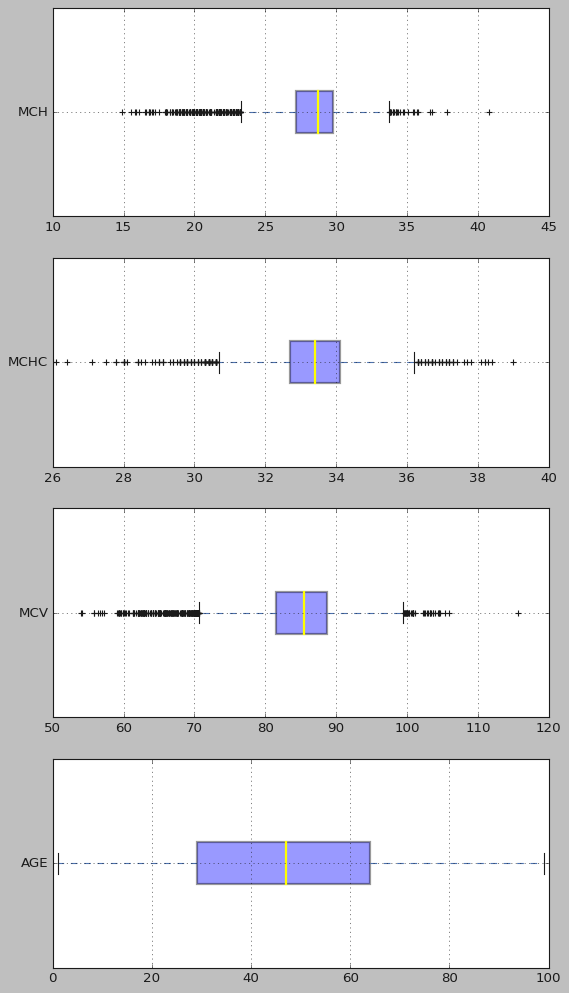

In [14]:
# BOXPLOTS, FORMA 1 DE REPRESENTAR SUBLPLOTS
# Hay varios outliers, sin embargo, tienen relación con los datos del histograma por lo que no considero que eliminarlos sea la mejor opción
fig, axes = plt.subplots(4, 1, figsize=(8, 15))
for x, c in enumerate(['MCH', 'MCHC', 'MCV', 'AGE']):
    f = df1[[c]].boxplot(ax=axes[x], vert=False, widths = 0.2, patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='Yellow'), boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = 0.4))

Estos boxplots demuestran que la mayoría de los datos graficados tienen datos outliers y la distribución es casi igual, son variables bastante simétricas 

In [86]:
from plotly import graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [87]:
# Fuente https://www.kaggle.com/code/ozgurbayram00/diabetes-eda-prediction-a-complete-ml-guide
def suma_variables(df1, num_var):
  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Quantiles", "Distribution"))
  fig.add_trace(go.Box(y = df1[num_var], name = str(num_var), showlegend = False, marker_color = "#A6D0DD"), row = 1, col = 1)
  fig.add_trace(go.Histogram(x = df1[num_var], xbins = dict(start = df[num_var].min(), end = df[num_var].max()), showlegend = False, name = str(num_var), marker=dict(color="#0A4D68", line = dict(color = '#DBE6EC', width = 1))), row = 1, col = 2)
  fig.update_layout(title={'text': num_var.capitalize(),'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly') 
  iplot(fig)                        

In [88]:
# Esta forma de representación es para ver el histograma y subplot en conjunto de las variables, de esta forma se puede ver la distribución de los outliers
for i in df1:
    suma_variables(df1, i)

EXPLICACION

In [66]:
#Hago un nuevo df solo con pacientes hospitalizados (in 1) 
df1_hospitalizados= df1[df1['SOURCE'] == 1]
df1_hospitalizados

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
11,54.0,16.6,7.61,10.0,88,21.8,30.7,71.0,1,F,1
12,31.7,10.4,4.91,9.7,348,21.2,32.8,64.6,1,M,1
23,53.0,16.3,7.54,4.3,112,21.6,30.8,70.3,1,F,1
24,34.6,11.2,4.42,7.0,152,25.3,32.4,78.3,1,F,1
25,34.7,11.5,4.50,5.1,135,25.6,33.1,77.1,1,F,1
...,...,...,...,...,...,...,...,...,...,...,...
4405,28.3,9.2,3.03,8.4,100,30.4,32.5,93.4,92,F,1
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,1
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,1


In [77]:
#Hago un nuevo df solo con pacientes ambulatorios out 0) 
df1_ambulatorio = df1[df1['SOURCE'] == 0]
df1_ambulatorio

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0
...,...,...,...,...,...,...,...,...,...,...,...
4400,23.2,7.7,2.55,10.2,134,30.2,33.2,91.0,92,F,0
4401,30.6,10.2,3.44,9.6,121,29.7,33.3,89.0,92,F,0
4402,29.1,9.5,3.24,8.9,116,29.3,32.6,89.8,92,F,0
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,0


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 379.3+ KB


Text(0.5, 0, 'Plaquetas')

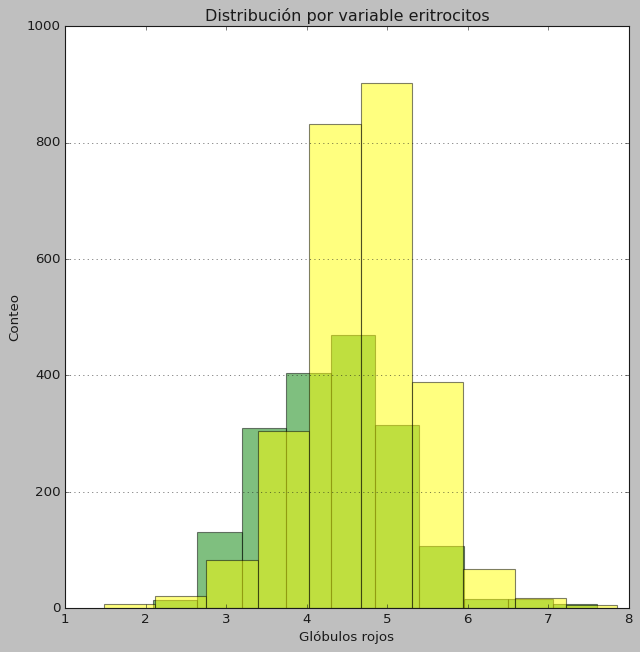

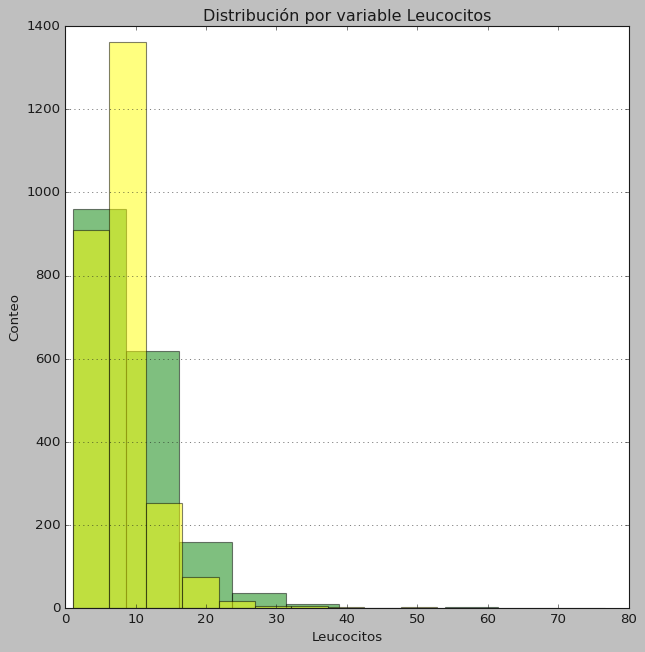

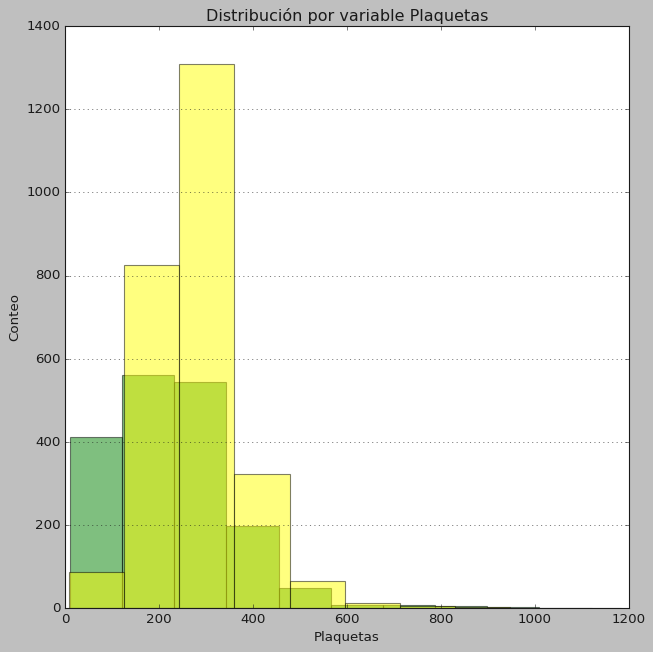

In [96]:
# Junto los df en el histograma, solo de las 3 grandes líneas, globulos rojos, blancos y plaquetas de acuerdo a pacientes hospitalizados o ambulatorios.
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['ERYTHROCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable eritrocitos')
plt.ylabel('Conteo')
plt.xlabel('Hematocrito')

df1_ambulatorio['ERYTHROCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable eritrocitos')
plt.ylabel('Conteo')
plt.xlabel('Glóbulos rojos')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['LEUCOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Leucocitos')
plt.ylabel('Conteo')
plt.xlabel('Leucocitos')

df1_ambulatorio['LEUCOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Leucocitos')
plt.ylabel('Conteo')
plt.xlabel('Leucocitos')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['THROMBOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Plaquetas')
plt.ylabel('Conteo')
plt.xlabel('Plaquetas')

df1_ambulatorio['THROMBOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Plaquetas')
plt.ylabel('Conteo')
plt.xlabel('Plaquetas')

# *GRÁFICOS MULTIVARIANTES*

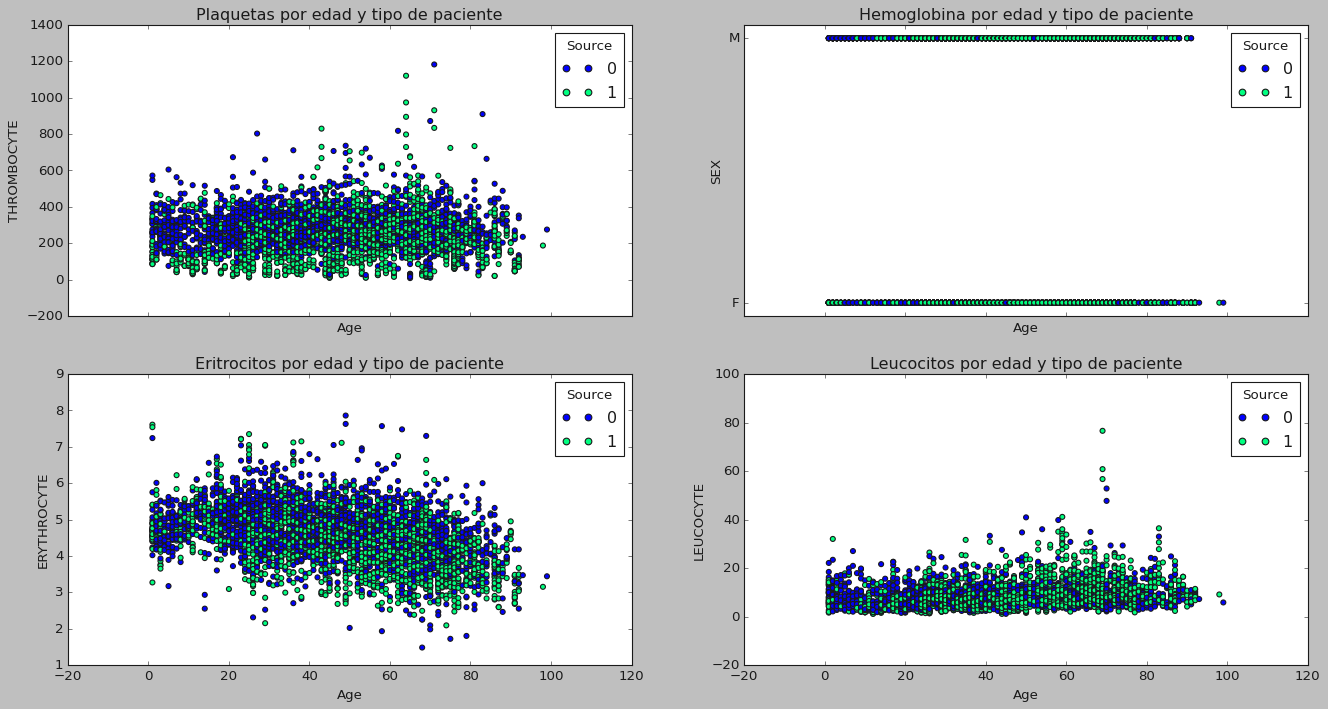

In [58]:
import matplotlib.pyplot as plt

# Subplot plaquetas
fig, ((ax0, ax1), (ax2, ax3))= plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True)
scatter = ax0.scatter(x=df1['AGE'], y=df1['THROMBOCYTE'], c=df1['SOURCE'], cmap='winter')
ax0.set(title='Plaquetas por edad y tipo de paciente', ylabel='THROMBOCYTE', xlabel='Age')
ax0.legend(*scatter.legend_elements(), title='Source')

# Subplot sexo
scatter = ax1.scatter(x=df1['AGE'], y=df1['SEX'], c=df1['SOURCE'], cmap='winter')
ax1.set(title='Hemoglobina por edad y tipo de paciente', ylabel='SEX', xlabel='Age')
ax1.legend(*scatter.legend_elements(), title='Source')

# Subplot eritrocitos
scatter = ax2.scatter(x=df1['AGE'], y=df1['ERYTHROCYTE'], c=df1['SOURCE'], cmap='winter')
ax2.set(title='Eritrocitos por edad y tipo de paciente', ylabel='ERYTHROCYTE', xlabel='Age')
ax2.legend(*scatter.legend_elements(), title='Source')

# Subplot leucocitos
scatter = ax3.scatter(x=df1['AGE'], y=df1['LEUCOCYTE'], c=df1['SOURCE'], cmap='winter')
ax3.set(title='Leucocitos por edad y tipo de paciente', ylabel='LEUCOCYTE', xlabel='Age')
ax3.legend(*scatter.legend_elements(), title='Source')


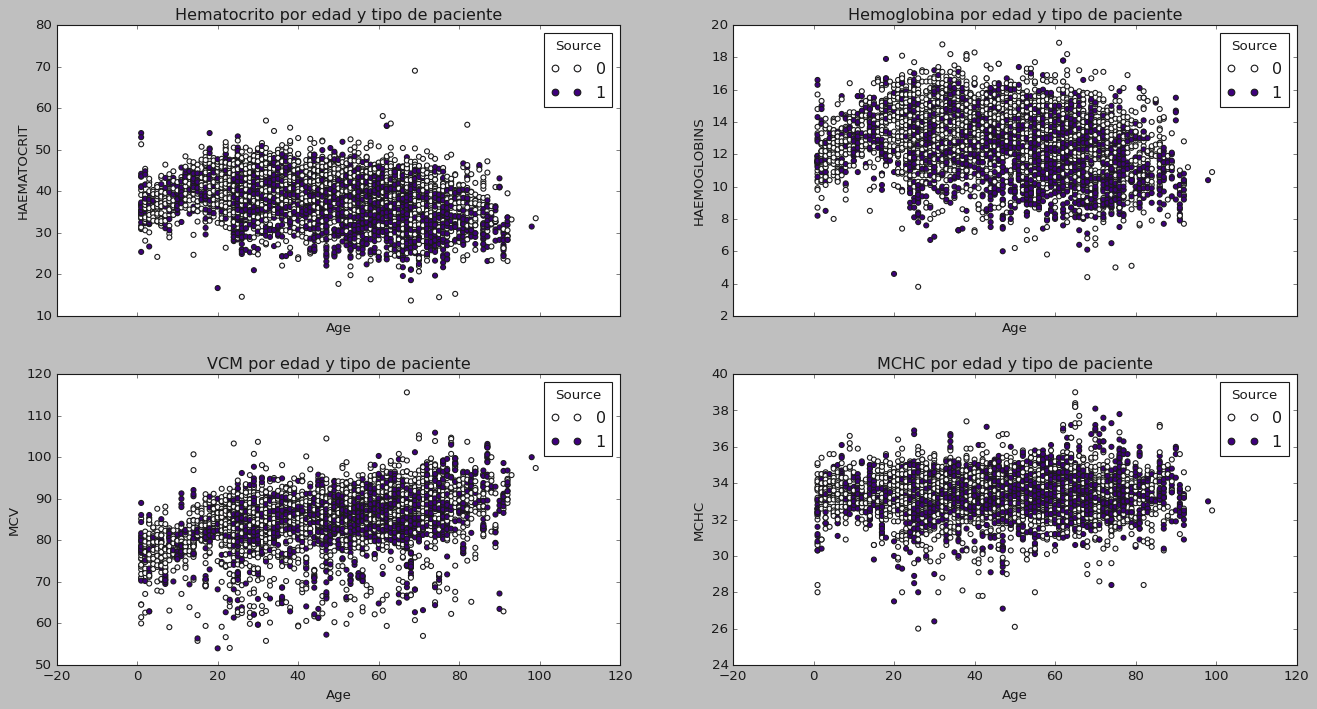

In [65]:
fig, ((ax0, ax1), (ax2, ax3))= plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True)
#Subplot hematocrito
scatter = ax0.scatter(x=df1['AGE'], y=df1['HAEMATOCRIT'], c=df1['SOURCE'], cmap='Purples')
ax0.set(title='Hematocrito por edad y tipo de paciente', ylabel='HAEMATOCRIT', xlabel='Age')
ax0.legend(*scatter.legend_elements(), title='Source')

# Subplot hemoglobina
scatter = ax1.scatter(x=df1['AGE'], y=df1['HAEMOGLOBINS'], c=df1['SOURCE'], cmap='Purples')
ax1.set(title='Hemoglobina por edad y tipo de paciente', ylabel='HAEMOGLOBINS', xlabel='Age')
ax1.legend(*scatter.legend_elements(), title='Source')

# Subplot VCM
scatter = ax2.scatter(x=df1['AGE'], y=df1['MCV'], c=df1['SOURCE'], cmap='Purples')
ax2.set(title='VCM por edad y tipo de paciente', ylabel='MCV', xlabel='Age')
ax2.legend(*scatter.legend_elements(), title='Source')

# Subplot MCHC
scatter = ax3.scatter(x=df1['AGE'], y=df1['MCHC'], c=df1['SOURCE'], cmap='Purples')
ax3.set(title='MCHC por edad y tipo de paciente', ylabel='MCHC', xlabel='Age')
ax3.legend(*scatter.legend_elements(), title='Source')
